In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df_purchase = pd.read_csv('purchase data.csv')
df_purchase.head()


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [7]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [17]:
scaler = pickle.load(open('scalar.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

In [27]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_std_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_std_pca)
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [28]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [36]:
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence':'n visits'})
temp1.head()

,n visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [40]:
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'n purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,n visits,n purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [41]:
temp3['average n purchase']=temp3['n purchases']/temp3['n visits']
temp3.head()

,n visits,n purchases,average n purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [51]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
temp4 = temp4.rename(columns = {'Incidence':'n visits'})
df_purchace_descr = temp3.join(temp4)
df_purchace_descr.head()

,n visits,n purchases,average n purchase,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


In [53]:
segm_prop = df_purchace_descr[['n purchases', 'Segment']].groupby(['Segment']).count()/df_purchace_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'n purchases':'segment proportions'})
segm_prop.head()

,segment proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


Text(0.5, 1.0, 'segment props')

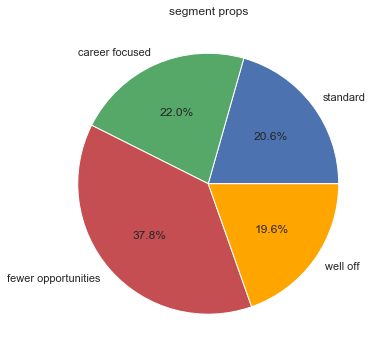

In [71]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['segment proportions'],labels = ['standard', 'career focused', 'fewer opportunities', 'well off'],
    autopct='%1.1f%%',
    colors = ('b','g','r', 'orange'))
plt.title('segment props')

In [83]:
segments_mean = df_purchace_descr.groupby(['Segment']).mean()
segments_mean

,n visits,n purchases,average n purchase
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


Text(0.5, 1.0, 'average mumber of store visits by segment')

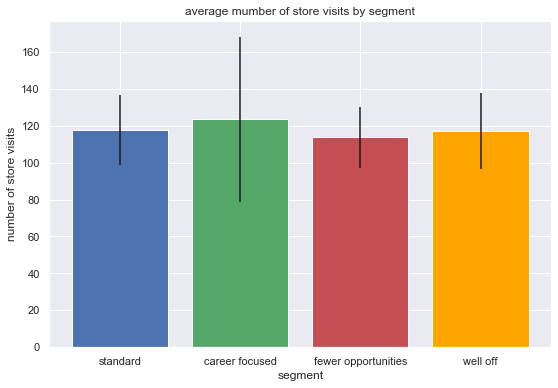

In [84]:
segments_std = df_purchace_descr.groupby(['Segment']).std()
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3),
       tick_label = ('standard','career focused','fewer opportunities','well off'),
       height = segments_mean['n visits'],
       yerr=segments_std['n visits'],
       color = ('b','g','r','orange'))
plt.xlabel('segment')
plt.ylabel('number of store visits')
plt.title('average mumber of store visits by segment')

Text(0.5, 1.0, 'purchases incidinces by segment')

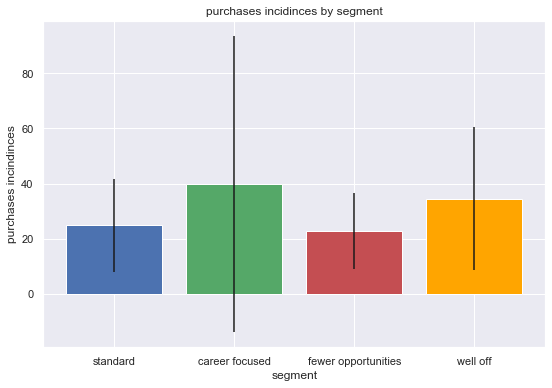

In [85]:
segments_std = df_purchace_descr.groupby(['Segment']).std()
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3),
       tick_label = ('standard','career focused','fewer opportunities','well off'),
       height = segments_mean['n purchases'],
       yerr=segments_std['n purchases'],
       color = ('b','g','r','orange'))
plt.xlabel('segment')
plt.ylabel('purchases incindinces')
plt.title('purchases incidinces by segment')

Text(0.5, 1.0, 'average purchases incidinces by segment')

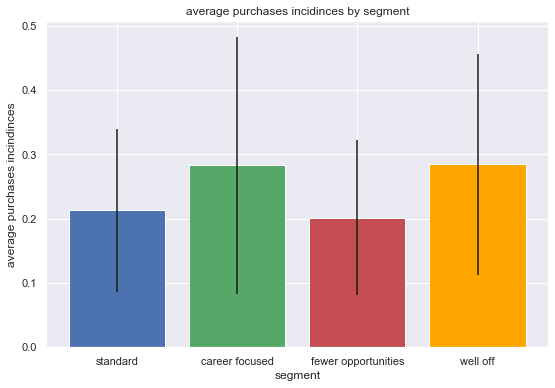

In [87]:
segments_std = df_purchace_descr.groupby(['Segment']).std()
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3),
       tick_label = ('standard','career focused','fewer opportunities','well off'),
       height = segments_mean['average n purchase'],
       yerr=segments_std['average n purchase'],
       color = ('b','g','r','orange'))
plt.xlabel('segment')
plt.ylabel('average purchases incindinces')
plt.title('average purchases incidinces by segment')

In [102]:
df_purchase_incidences = df_purchase_predictors[df_purchase_predictors['Incidence']==1]
brand_dummies = pd.get_dummies(df_purchase_incidences['Brand'],prefix = 'Brand',prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID']=df_purchase_incidences['Segment'], df_purchase_incidences['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


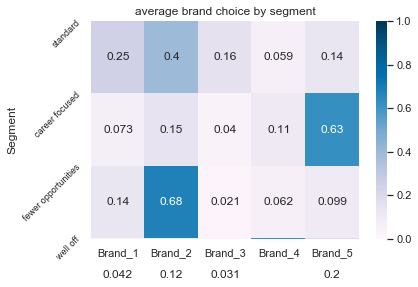

In [104]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()
mean_brand_choice = temp.groupby(['Segment'], as_index=True).mean()
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot = True,
           )
plt.yticks([0,1,2,3],['standard','career focused','fewer opportunities','well off'], rotation = 45, fontsize = 9)
plt.title('average brand choice by segment')
plt.show()

In [142]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1']=temp['Price_1']*temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']]=temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [143]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2']=temp['Price_2']*temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']]=temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2
0,0,2611.19,4768.52
1,1,736.09,1746.42
2,2,2258.90,13955.14
3,3,699.47,1298.23


In [144]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3']=temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']]=temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,2611.19,4768.52,3909.17
1,1,736.09,1746.42,664.75
2,2,2258.90,13955.14,716.25
3,3,699.47,1298.23,731.35


In [145]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4']=temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']]=temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,2611.19,4768.52,3909.17,861.38
1,1,736.09,1746.42,664.75,2363.84
2,2,2258.90,13955.14,716.25,1629.31
3,3,699.47,1298.23,731.35,14185.57


In [146]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5']=temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']]=temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [147]:
segments_brand_revenue['total revenue'] = (segments_brand_revenue['Revenue Brand 1']+
                                          segments_brand_revenue['Revenue Brand 2']+
                                          segments_brand_revenue['Revenue Brand 3']+
                                          segments_brand_revenue['Revenue Brand 4']+
                                          segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,total revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [149]:
segments_brand_revenue['Segment Proportions']=segm_prop['segment proportions']
segments_brand_revenue['Segment']=segments_brand_revenue['Segment'].map({0:'Standard',
                                                                        1:'Career focused',
                                                                        2:'fewer opportunities',
                                                                        3:'well off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,total revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
fewer opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
well off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
